<a href="https://colab.research.google.com/github/auramolina/Analitica-en-recursos-humanos/blob/main/Modelado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías

In [1]:
#### Cargar paquetes
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, get_scorer_names, accuracy_score,confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler ## escalar variables

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import accuracy_score, classification_report

import joblib  ### para guardar modelos
import openpyxl

In [10]:
## Conectar el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
d2015 = pd.read_csv('https://raw.githubusercontent.com/auramolina/Analitica-en-recursos-humanos/main/Datos/dummies2015')
d2015.sort_values(by=['EmployeeID'],ascending=1)

,Age,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,6,2,1,0,1,131160,1.0,11,0,...,False,False,False,False,False,False,False,False,True,False
1,31,10,1,2,0,1,41890,0.0,23,1,...,False,False,False,False,True,False,False,False,False,True
2,32,17,4,3,1,4,193280,1.0,15,3,...,False,False,False,False,False,True,False,False,True,False
3,38,2,5,4,1,3,83210,3.0,11,3,...,False,False,False,False,False,False,False,False,True,False
4,32,10,1,5,1,1,23420,4.0,12,2,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,29,7,1,8792,0,1,21800,1.0,21,0,...,False,False,False,False,True,False,False,False,False,True
4386,33,11,4,8797,1,1,71400,5.0,21,0,...,False,False,False,False,True,False,False,False,True,False
4388,33,1,3,8799,1,2,51470,7.0,11,0,...,False,True,False,False,False,False,False,False,True,False
4391,32,23,1,8802,1,3,24680,0.0,11,0,...,False,False,False,False,False,False,False,False,False,True


# Separación variables

In [5]:
### Variable respuesta
y = d2015['Attrition_Yes']

## Variables explicativas
X1 = d2015.loc[:,~d2015.columns.isin(['Attrition_Yes'])]

## Estandarización

In [7]:
## Estandarización y escalado de los datos
scaler = StandardScaler()
scaler.fit(X1)
X2 = scaler.transform(X1)
X = pd.DataFrame(X2,columns=X1.columns)

# Modelos Iniciales

* Regresión logística: se selecciona LR por su fácil implementación, no requiere ajuste de hiperparametros y, es bueno en problemas de clasificación binaria.
* Bosques aleatorios: se selecciona RFC por su rendimiento, que generalmente es bueno, dando resultados satisfactorios, también porque es bueno en modelos que tienen muchas variables categóricas.

In [8]:
m_lr = LogisticRegression()
m_rf = RandomForestClassifier()

In [9]:
modelos = list([m_lr, m_rf])

## Selección de variables

## Árbol de decisión

|--- retirementType_Resignation <= 1.08
|   |--- retirementType_Fired <= 4.03
|   |   |--- class: 0
|   |--- retirementType_Fired >  4.03
|   |   |--- class: 1
|--- retirementType_Resignation >  1.08
|   |--- class: 1



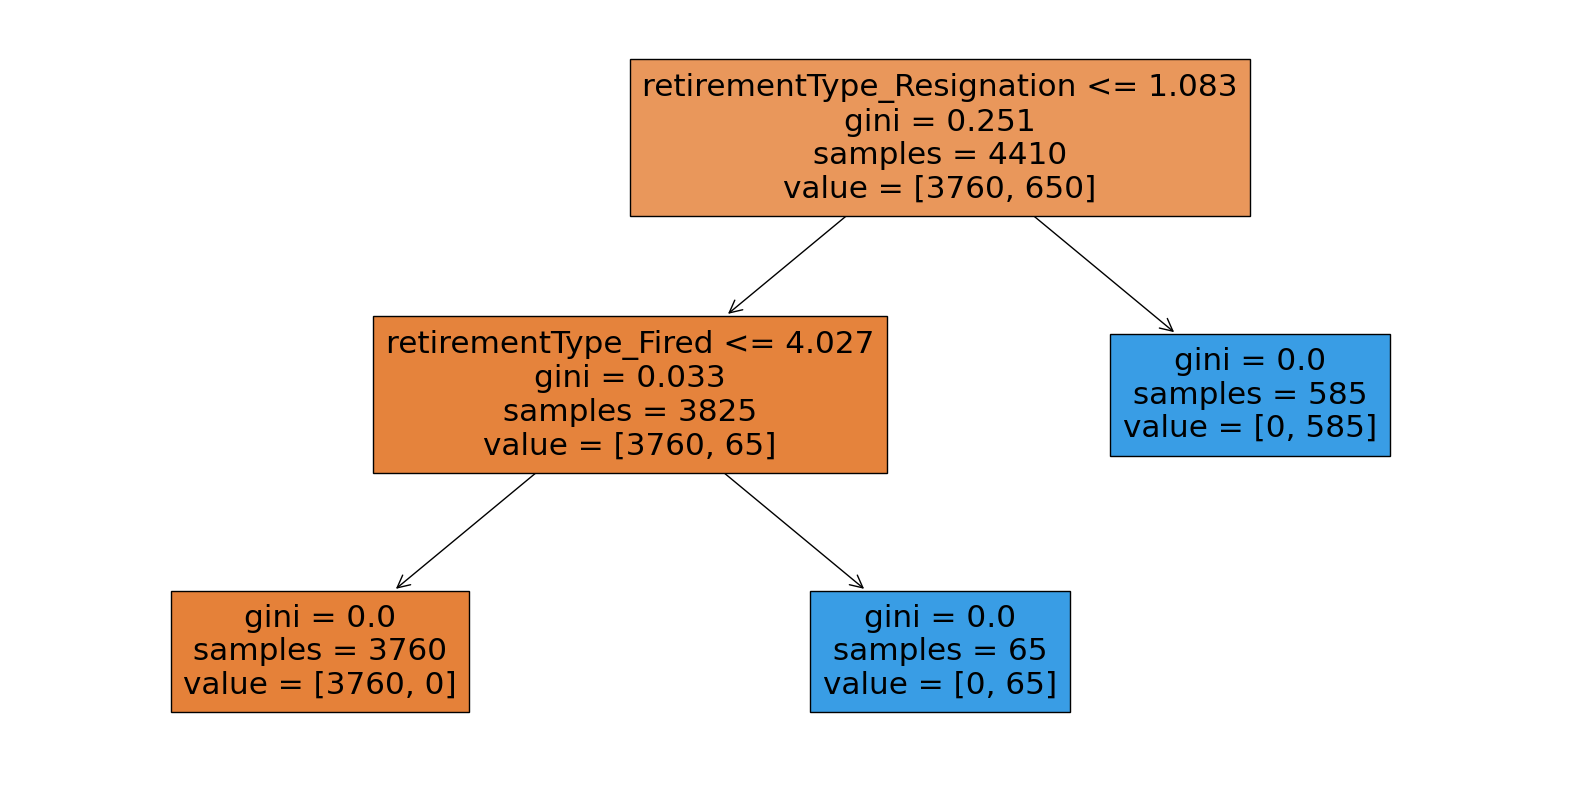

In [ ]:

# Crear y entrenar el modelo de árbol de decisión
rtree = DecisionTreeClassifier(max_depth=3)
rtree.fit(X=X, y=y)

# Generar una representación de texto del árbol de decisión
tree_text = export_text(rtree, feature_names=X.columns.tolist())
print(tree_text)

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(rtree, feature_names=X.columns.tolist(), filled=True)
plt.show()

# Modelado

In [ ]:
print("training shape: ",X.shape)

training shape:  (4410, 49)


In [ ]:
#models
log_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

In [ ]:
# first check the accuracy score on without scalled features
for clf in [log_clf, knn_clf, dt_clf, rf_clf]:
    clf.fit(X, y)

    pred = clf.predict(x_test)

    print(clf.__class__.__name__, " ", accuracy_score(y_test,pred))